In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize

In [22]:
def fit_norm(x,mu,sigma):
    return st.norm.pdf(x,mu,sigma)

In [4]:
df = pd.read_csv("Data/COM_velocity.csv")
df.head()

,logv,outcome
0,1.453088,0.823171
1,1.512408,1.280488
2,1.576002,1.966463
3,1.642271,3.155488
4,1.709314,4.070122


In [5]:
logv = df['logv'].to_numpy()
percent = df['outcome'].to_numpy()

In [12]:
logv_mu =np.mean(logv)
logv_sigma = np.std(logv)

In [26]:
normalization_factor = np.trapz(percent,logv)
print(normalization_factor)

8.598088620561047


In [27]:
percent = percent/normalization_factor

In [30]:
params, pcov = optimize.curve_fit(fit_norm,logv,percent)

Text(0.5, 1.0, 'Binary COM ejection velocity distribution')

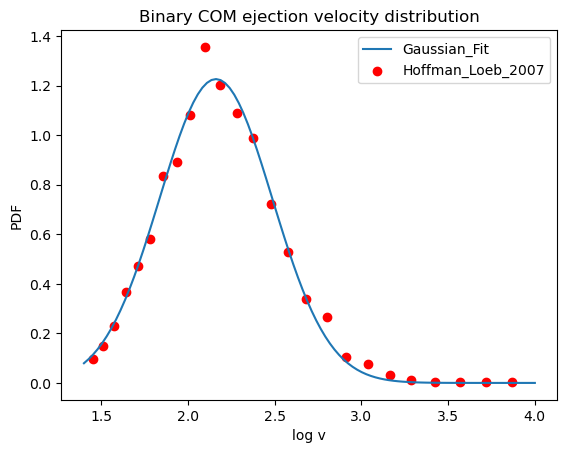

In [61]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Binary COM ejection velocity distribution")

In [82]:
df_trip = pd.read_csv("Data/tripleBH_velocity.csv")
df_trip.head()

,logv,outcome
0,1.429737,0.047475
1,1.517554,0.096476
2,1.600387,0.010117
3,1.695664,0.329724
4,1.783549,0.108457


In [83]:
logv = df_trip['logv'].to_numpy()
percent = df_trip['outcome'].to_numpy()

In [86]:
normalization_factor = np.trapz(percent,logv)
print(normalization_factor)

8.767781255044273


In [87]:
percent = percent/normalization_factor

In [88]:
params, pcov = optimize.curve_fit(fit_norm,logv,percent)

In [93]:
10**(params[0])

750.3385085154795

Text(0.5, 1.0, 'Single BH ejection velocity distribution')

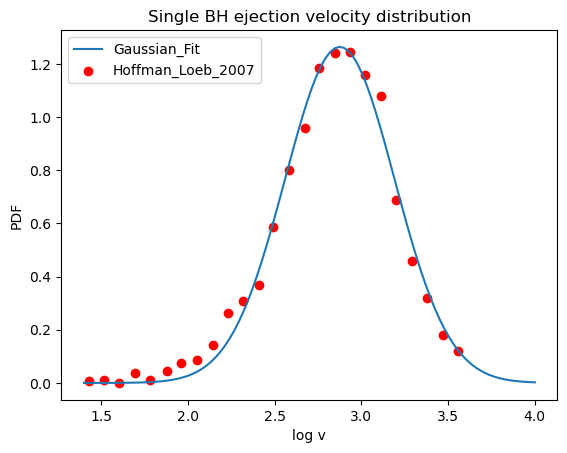

In [90]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Single BH ejection velocity distribution")